In [27]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('reviews.csv')
df.describe()

,Name,Rating,Header,Comment,Date
count,222,222,222,215,222
unique,210,4,212,206,195
top,Name,Rated 1 out of 5 stars,Header,Comment,Date
freq,10,203,10,10,10


In [28]:
# dropped rows where in column 'Name' we had 'Name'
df = df[df['Name'] != 'Name']

# reset index
df.reset_index(drop=True, inplace=True)

# we can check with this code, if we did everything correctly
# df[df['Name'] == 'Name']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     212 non-null    object
 1   Rating   212 non-null    object
 2   Header   212 non-null    object
 3   Comment  205 non-null    object
 4   Date     212 non-null    object
dtypes: object(5)
memory usage: 8.4+ KB


In [29]:

# checks amount of null
df.isnull().sum()

Name       0
Rating     0
Header     0
Comment    7
Date       0
dtype: int64

In [30]:
# we will remove rows with missing values
df = df.dropna(subset=['Comment'])
df.isnull().sum()

Name       0
Rating     0
Header     0
Comment    0
Date       0
dtype: int64

In [31]:
# deleted useless information from rating column strings and turned them into integer
df['Rating'] = df['Rating'].str.extract(r'(\d+)')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 210
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     205 non-null    object
 1   Rating   205 non-null    int64 
 2   Header   205 non-null    object
 3   Comment  205 non-null    object
 4   Date     205 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.6+ KB


In [32]:
df.head()

,Name,Rating,Header,Comment,Date
0,Vladimir Banovic,1,No Food No Reimbursement,No Food delivery (which does happen sooner or ...,"April 08, 2025"
1,Kat,1,Poor service,They put the blame on customers for their erro...,"April 26, 2025"
2,Viktoriya Khomenko,1,The order was not delivered but…,The order was not delivered but according to B...,"April 25, 2025"
3,Gil Oliveira,1,This service is a scam,This service is a scam. They declared the orde...,"April 24, 2025"
4,Lena,1,Didn't get the refund,Because the food was spoiled during transporta...,"April 01, 2025"


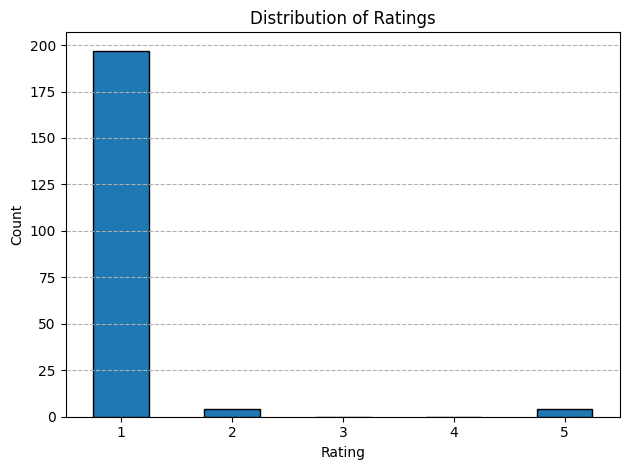

In [33]:
df["Rating"].value_counts().sort_index().reindex(range(1, 6)).plot(
    kind="bar", 
    edgecolor="black"
)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=1)

plt.tight_layout()
plt.show()

## Sentiment Analysis 

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

In [62]:
# example
sia.polarity_scores(df["Comment"][50])

{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.0516}

In [65]:

df["Sentiment"] = df["Comment"].progress_apply(lambda x: sia.polarity_scores(x)["compound"])

  0%|          | 0/205 [00:00<?, ?it/s]

100%|██████████| 205/205 [00:00<00:00, 686.65it/s]


In [83]:
df.describe()

,Rating,Sentiment
count,205.000000,205.000000
mean,1.097561,-0.282629
std,0.569007,0.574645
min,1.000000,-0.991100
25%,1.000000,-0.773600
50%,1.000000,-0.476700
75%,1.000000,0.077200
max,5.000000,0.956500


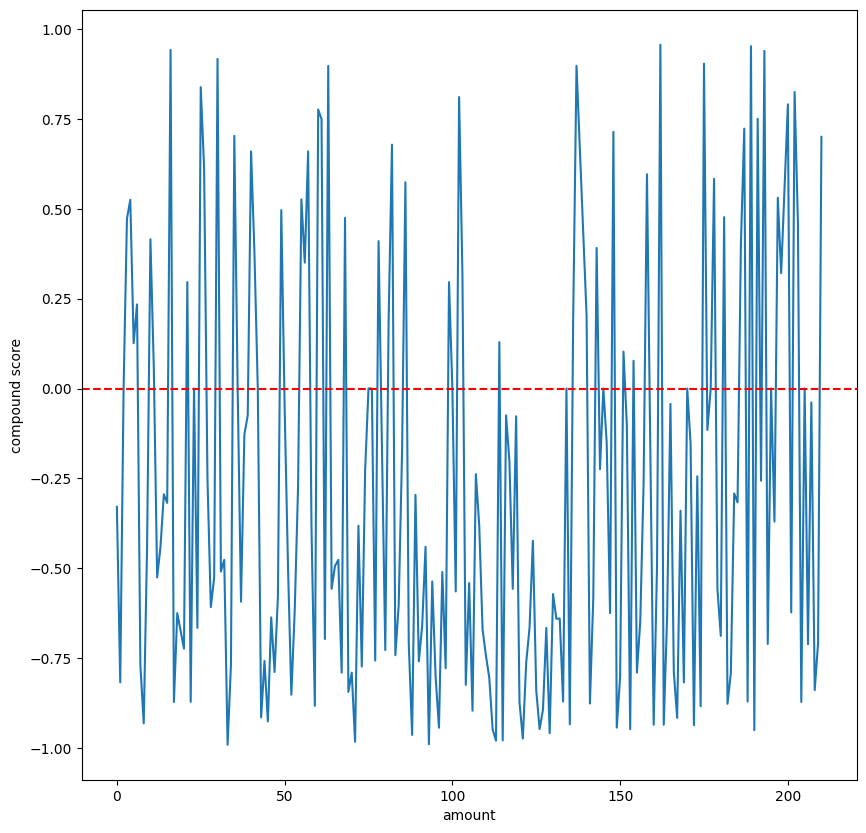

In [94]:
df["Sentiment"].plot(kind="line", figsize=(10,10),ylabel="compound score", xlabel="amount")
plt.axhline(y=0, color='r', linestyle='--')

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comment'])


lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #0:
order food service worst use app support bad dont courier
Topic #1:
order food restaurant service use don courier cancel recommend bad
Topic #2:
food order support customer bolt service delivered just app courier
Topic #3:
terrible food service delivery worst support customer delivered order away
Topic #4:
food bolt order bank customer cold service refund time pay


In [ ]:
# Saving modified CSV
df.to_csv('New_Reviewers_Info.csv',index=False)